In [1]:
#Coefficient of multiple correlation
# The phenotypic characteristics of each stomata complex is extracted by the Mask RCNN and CellProifler pipeline
# !pip install pycytominer
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
morph = pd.read_csv("./Oscar_scaled_avgSCO.csv")
morph.head()

,Unnamed: 0,Metadata_week.x,Metadata_genotype.x,Group,Subgroup,GCO_stomata_desity,GCO_AreaShape_Area,GCO_AreaShape_BoundingBoxArea,GCO_AreaShape_Compactness,GCO_AreaShape_ConvexArea,...,avg_sco_Perimeter,avg_sco_BoundingBoxArea,avg_sco_ConvexArea,avg_sco_Eccentricity,avg_sco_FormFactor,avg_sco_MeanRadius,avg_sco_MaximumRadius,avg_sco_Area,avg_sco_MinorAxisLength,Ratio_G_S_area
0,0,Week1,B73,SS,SS-B73,10,405,576,2.308191,458,...,97.012193,780,478,0.860685,0.558128,3.030867,7.810250,418,18.190126,0.484450
1,1,Week1,B73,SS,SS-B73,10,381,495,2.239848,432,...,86.597980,648,420,0.824073,0.660223,3.238071,8.544004,394,18.064705,0.483503
2,2,Week1,B73,SS,SS-B73,10,490,954,2.565985,605,...,101.254834,840,483,0.912109,0.507433,2.895797,7.280110,414,16.092025,0.591787
3,3,Week1,B73,SS,SS-B73,10,416,750,2.586656,512,...,86.870058,494,363,0.944008,0.559511,2.731353,6.324555,336,12.390288,0.619048
4,4,Week1,B73,SS,SS-B73,10,410,624,2.315030,475,...,85.597980,612,383,0.875284,0.595131,2.913475,7.211103,347,15.644407,0.590778


In [2]:
df = morph.copy()
df = df.drop(columns = ['Unnamed: 0', "GCO_stomata_desity"])

from PCA_analysis import PCA_analysis
pca, final_df= PCA_analysis(df, True)

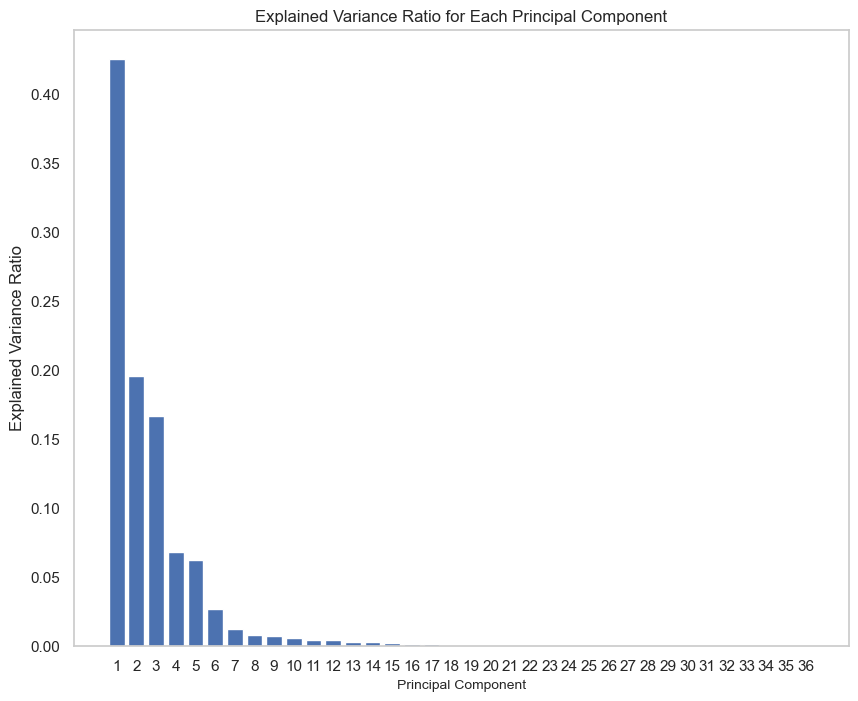

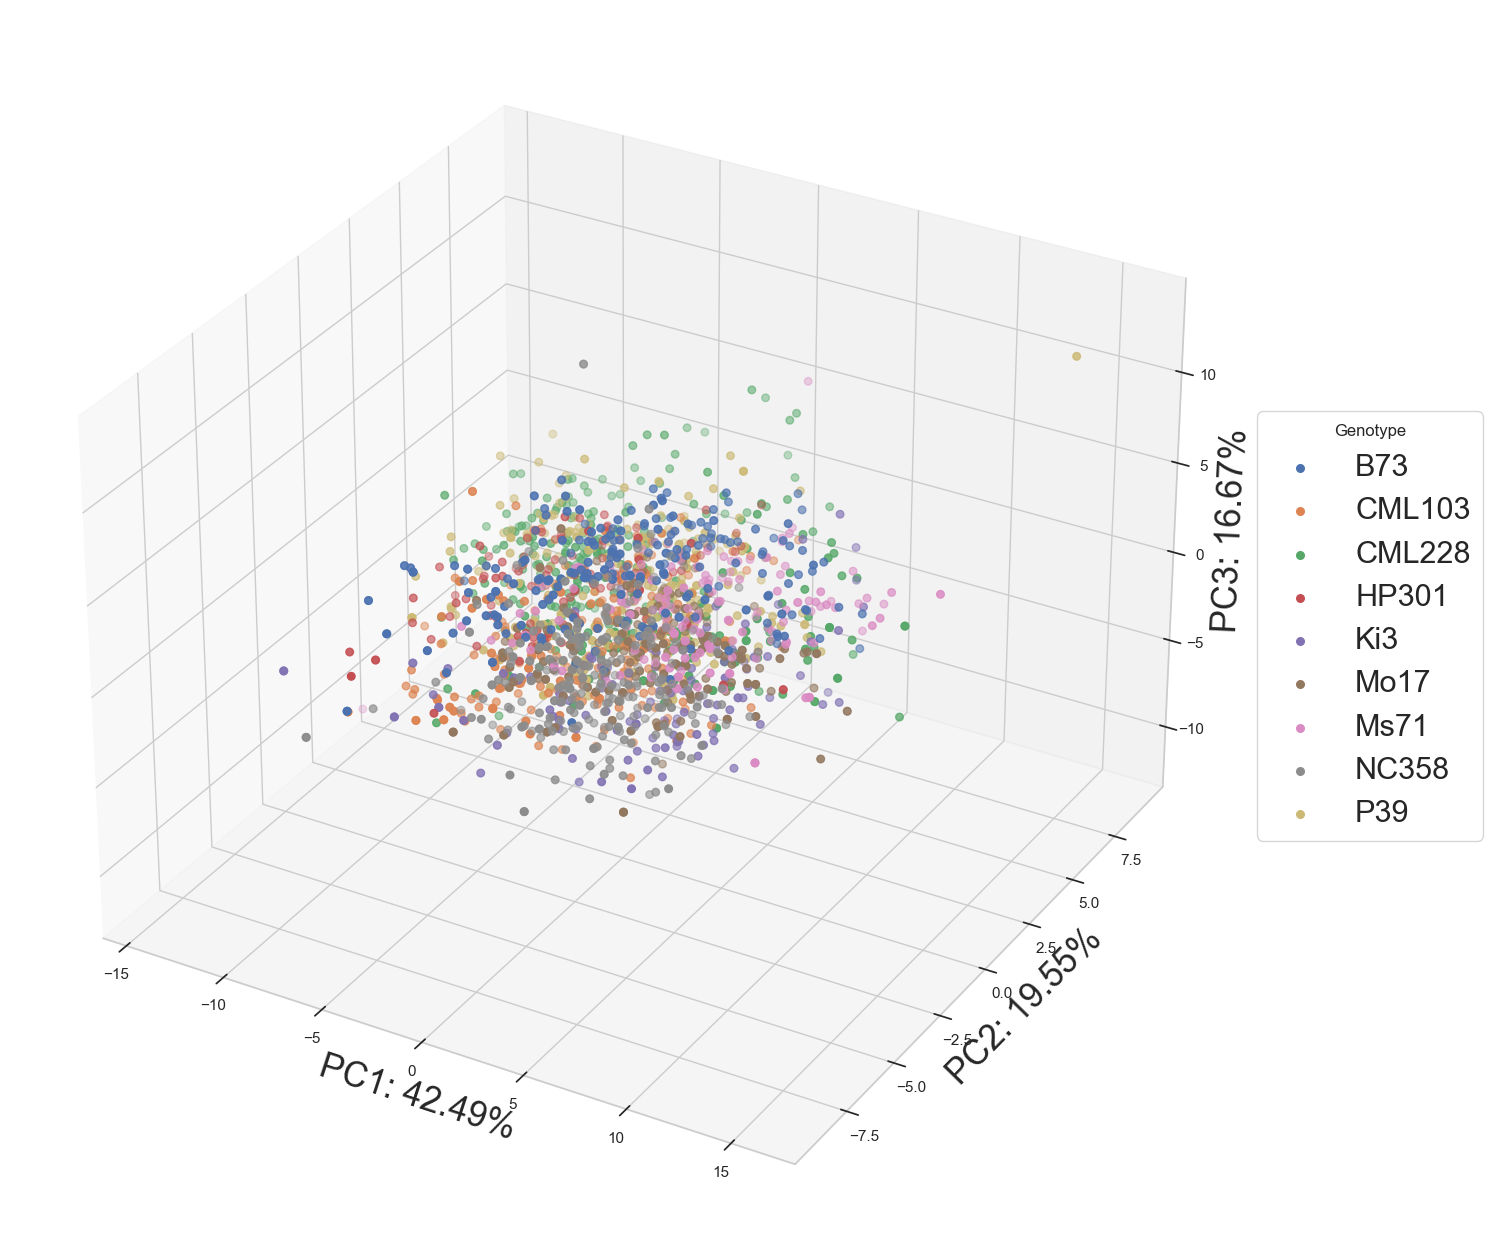

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot
fig = plt.figure(figsize=(10,8))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component', fontsize=10)
plt.grid(False)
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

# Plotting PCA results in 3D with color labels based on 'Metadata_genotype.x'
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for PC1, PC2, and PC3
for Genotype in final_df['Metadata_genotype.x'].unique():
    data = final_df[final_df['Metadata_genotype.x'] == Genotype]
    ax.scatter(data['PC1'], data['PC2'], data['PC3'], label=Genotype, s=30)

ax.set_xlabel(f'PC1: {pca.explained_variance_ratio_[0]*100:.2f}%', fontsize=25)
ax.set_ylabel(f'PC2: {pca.explained_variance_ratio_[1]*100:.2f}%', fontsize=25)
ax.set_zlabel(f'PC3: {pca.explained_variance_ratio_[2]*100:.2f}%', fontsize=25)
ax.legend(title='Genotype', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
plt.show()

Compare the classifiere performance using features from combination of GC and SC, GC, and SC seperately

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


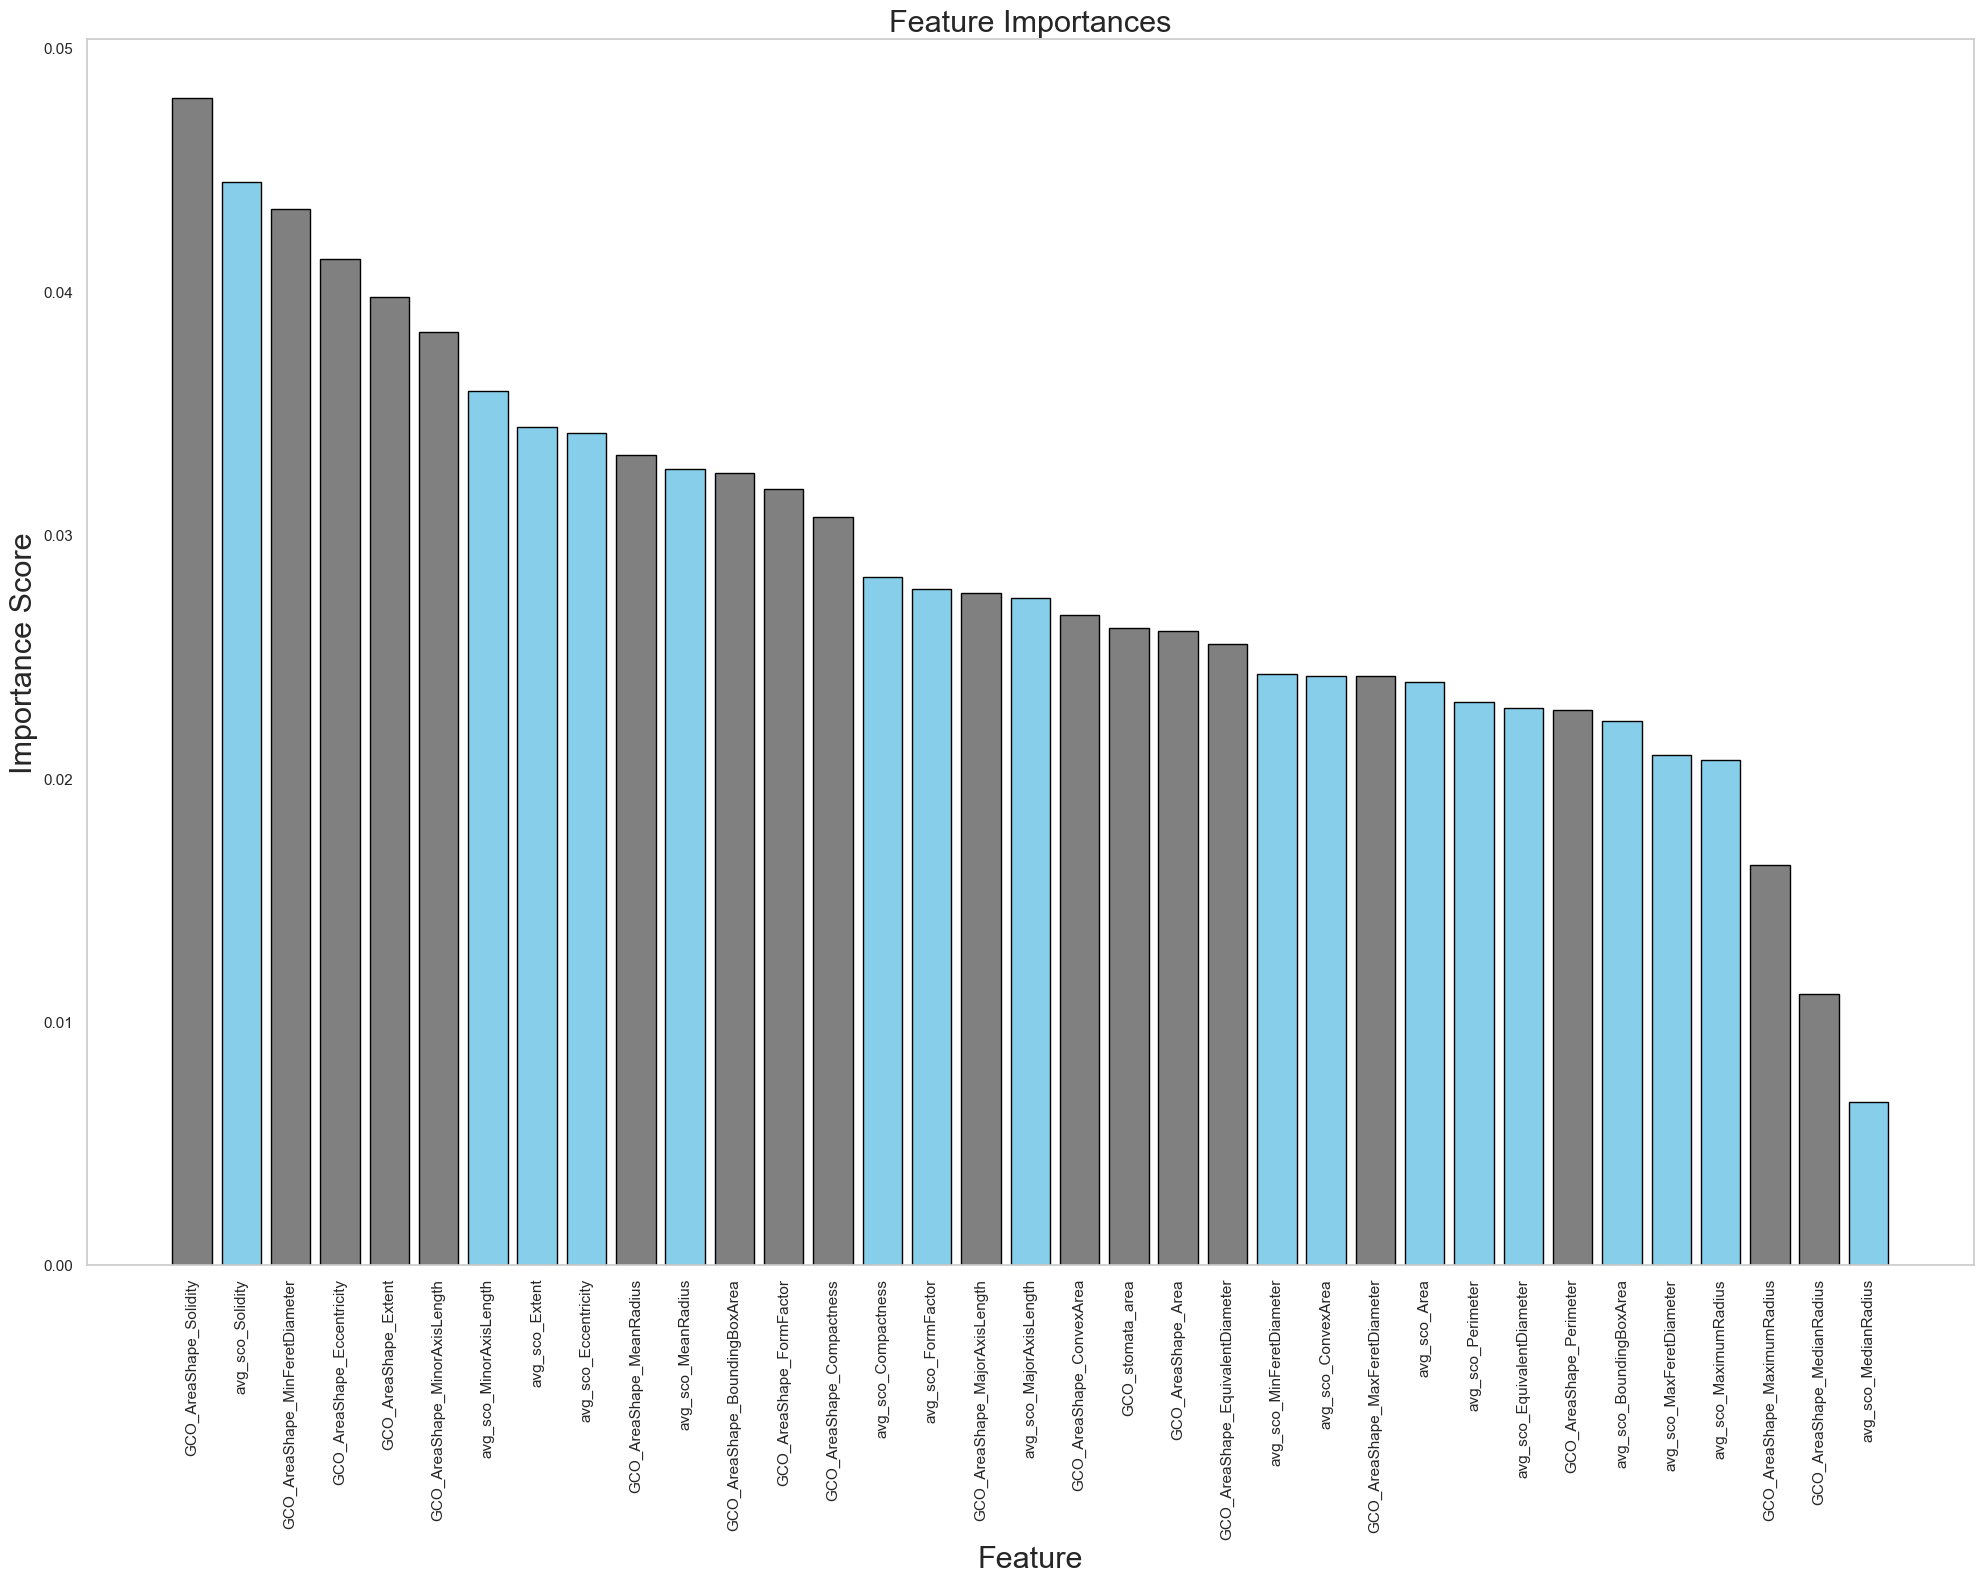

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.6973770628850912
Recall: 0.6883408071748879
F1 Score: 0.685684335463663
Accuracy: 0.6883408071748879
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]


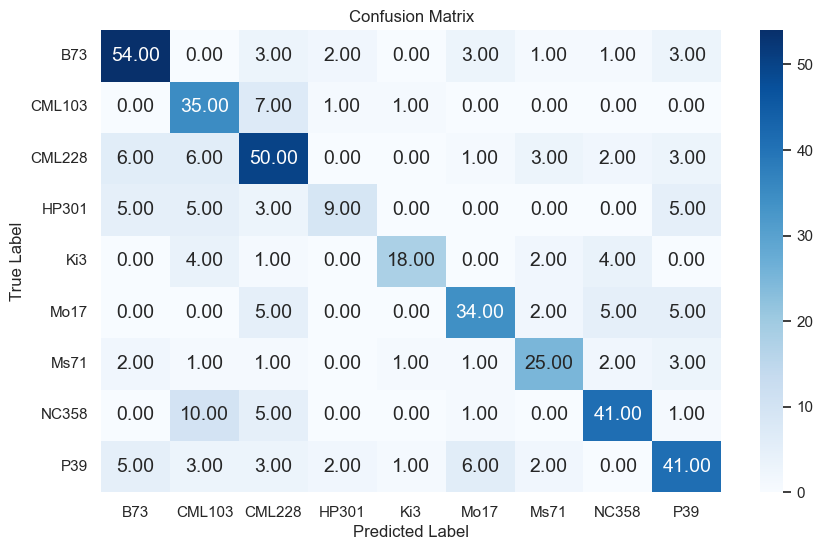

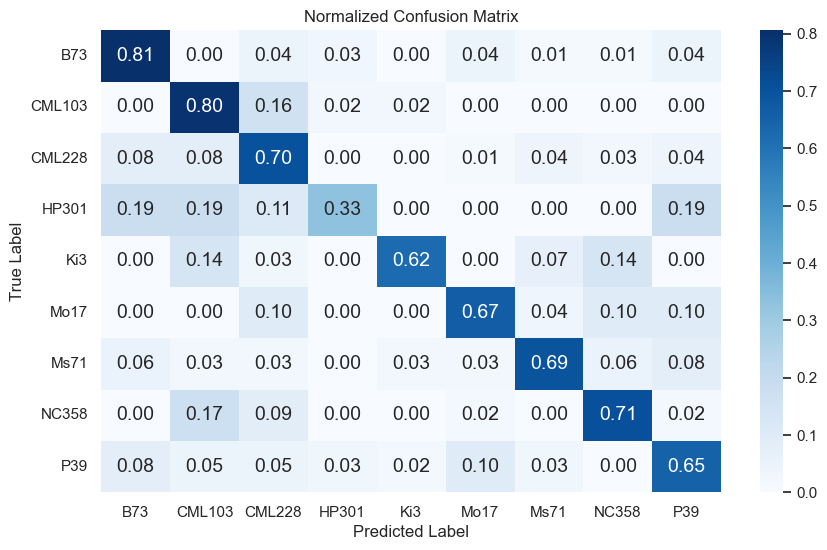

(     Metadata_genotype.x
 56                   B73
 494                  Ki3
 1676              CML228
 218                HP301
 744               CML228
 ...                  ...
 1911               NC358
 2033                 P39
 1132              CML103
 700               CML103
 1228              CML228
 
 [446 rows x 1 columns],
 array(['B73', 'Ki3', 'CML228', 'P39', 'CML228', 'Mo17', 'CML228', 'NC358',
        'HP301', 'Ms71', 'CML228', 'Ms71', 'CML103', 'CML103', 'CML228',
        'CML103', 'B73', 'P39', 'CML103', 'Mo17', 'B73', 'P39', 'P39',
        'Ms71', 'B73', 'Mo17', 'Mo17', 'CML228', 'B73', 'Mo17', 'P39',
        'P39', 'CML103', 'B73', 'CML103', 'Ms71', 'CML228', 'NC358',
        'CML228', 'NC358', 'P39', 'P39', 'CML228', 'CML228', 'CML103',
        'NC358', 'NC358', 'P39', 'Mo17', 'CML103', 'P39', 'B73', 'CML228',
        'CML228', 'CML228', 'B73', 'HP301', 'B73', 'Mo17', 'HP301', 'Mo17',
        'Ki3', 'NC358', 'B73', 'Ms71', 'NC358', 'NC358', 'CML103', 'Ms71',
    

In [5]:
### GC and SC features
genotypes = df['Metadata_genotype.x'].unique()

X = df.filter(regex='^(GCO|avg_)')
y = df.filter(['Metadata_genotype.x'])
from Random_forest_classifier import run_random_forest_classifier
feature_names, sorted_importances = run_random_forest_classifier(X, y, 1000, n = 42)

from Random_forest_classifier import visulize_feature_importance
visulize_feature_importance(20, 16, feature_names, sorted_importances)

from Random_forest_classifier import evaluation_classifier
from Random_forest_classifier import visulize_confusion_matrix

y_pred, y_test = evaluation_classifier(X, y, test_size=0.2, n_estimators=1000, random_state=42)
print(y_test)
columns = genotypes
visulize_confusion_matrix(y_ture=y_test, columns = columns,  y_pred = y_pred, a=10, b=6)


/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


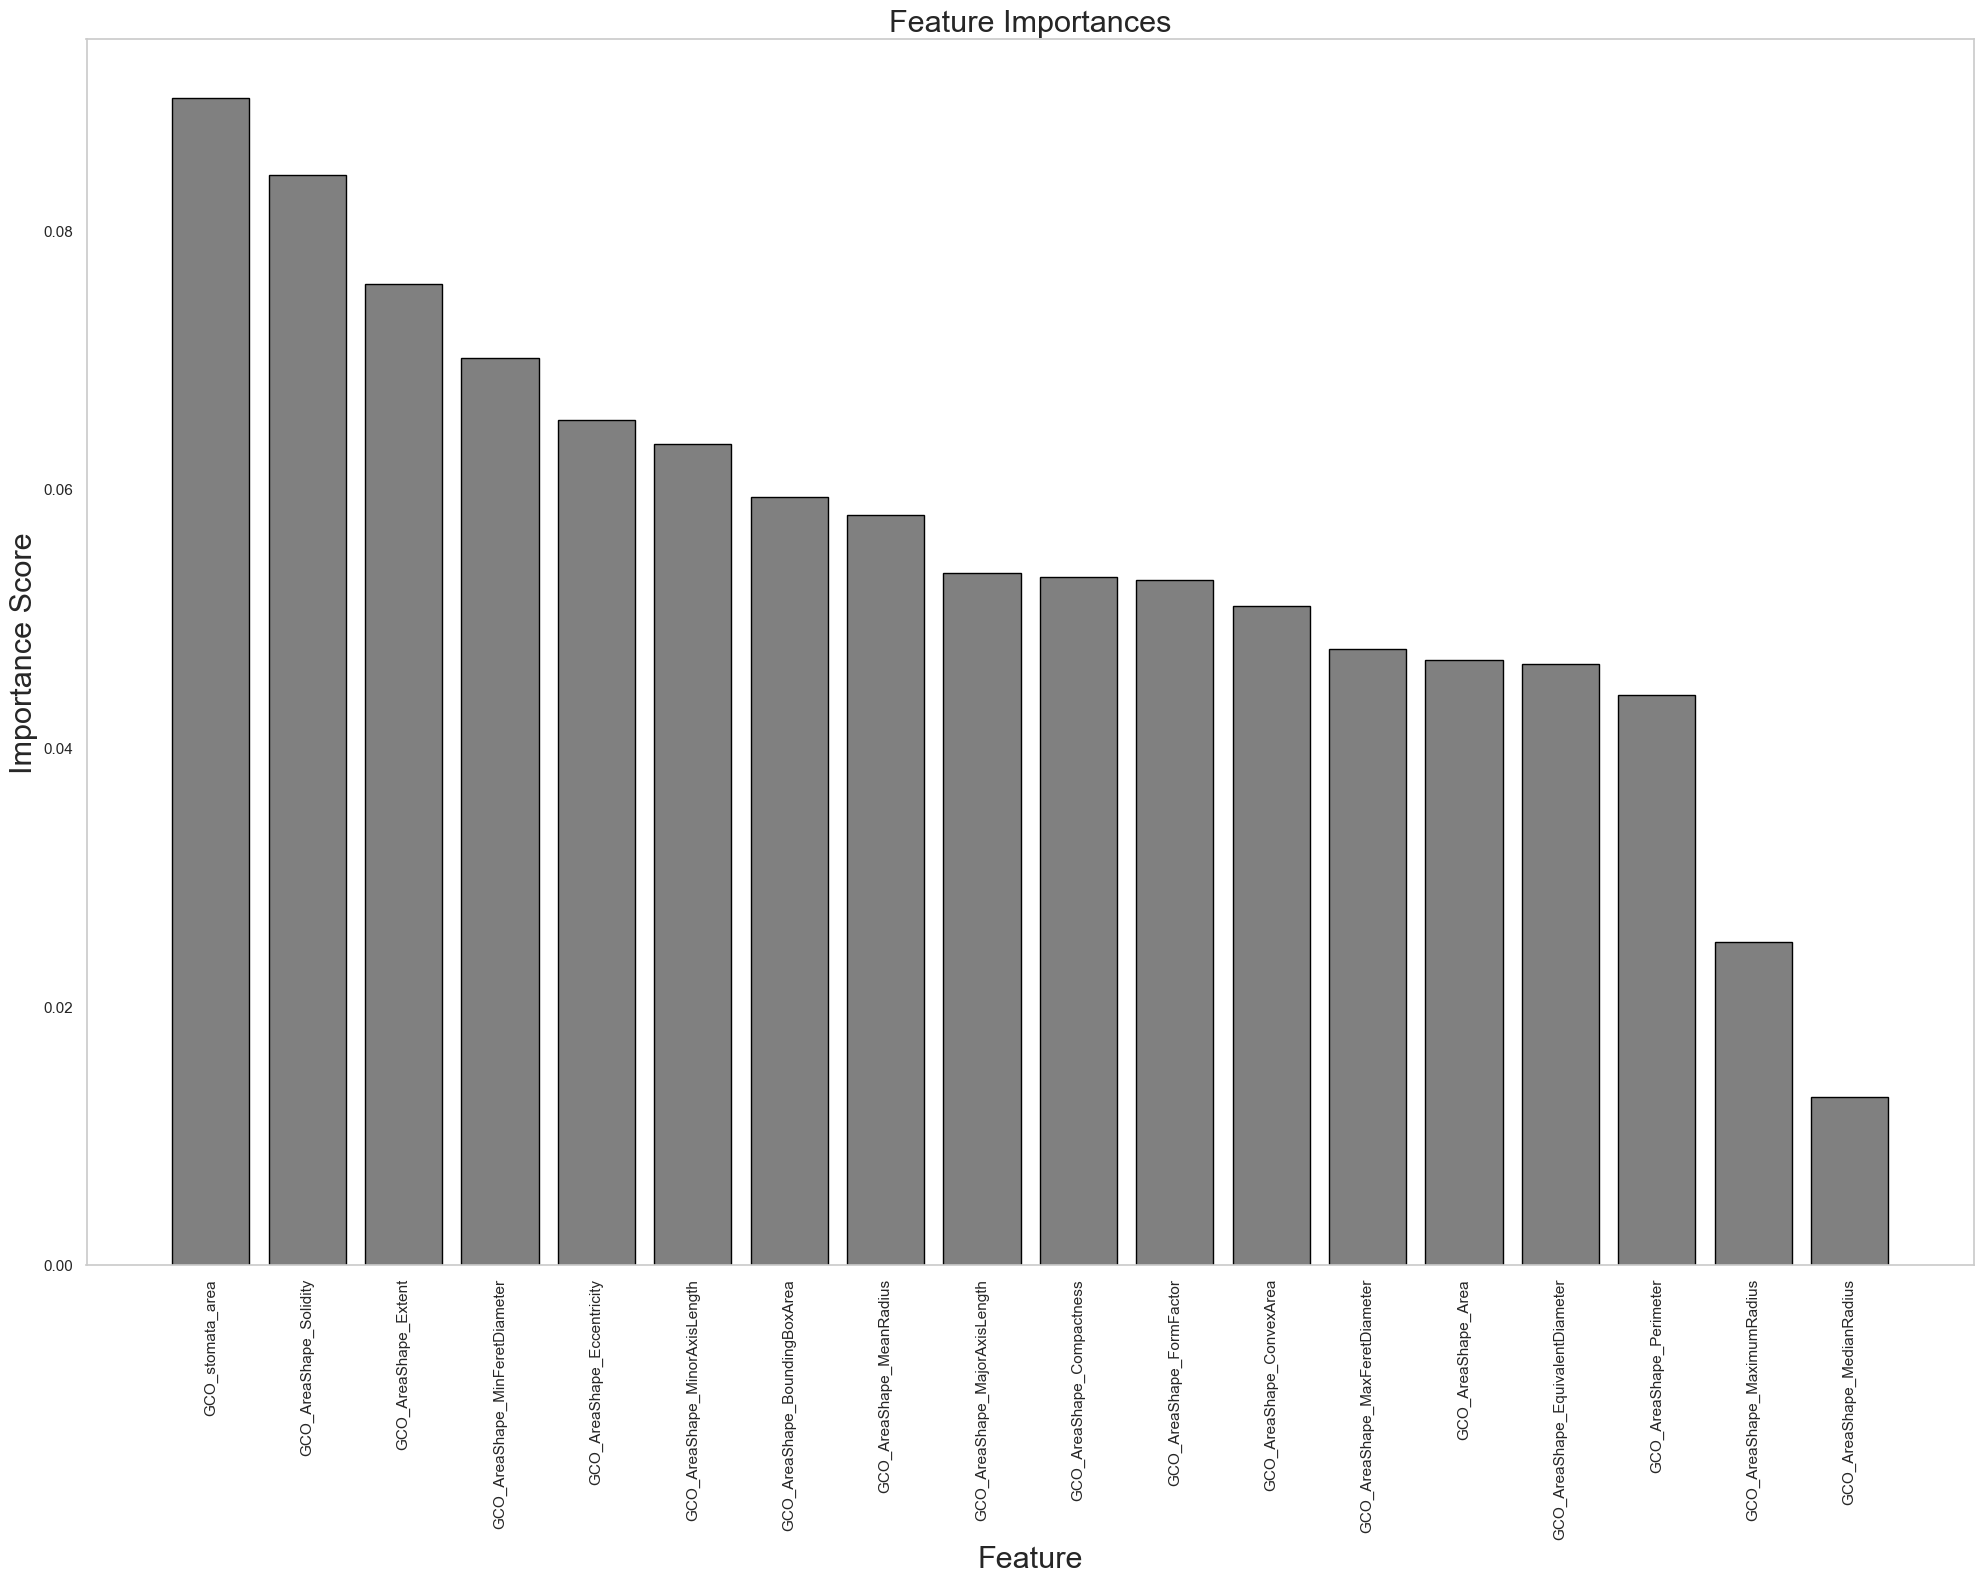

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.6610063684828678
Recall: 0.6457399103139013
F1 Score: 0.6388080288851967
Accuracy: 0.6457399103139013
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]


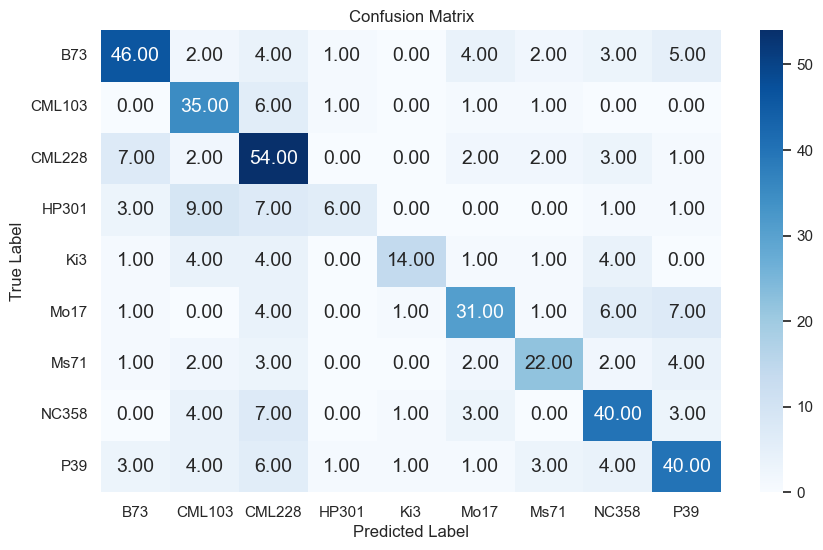

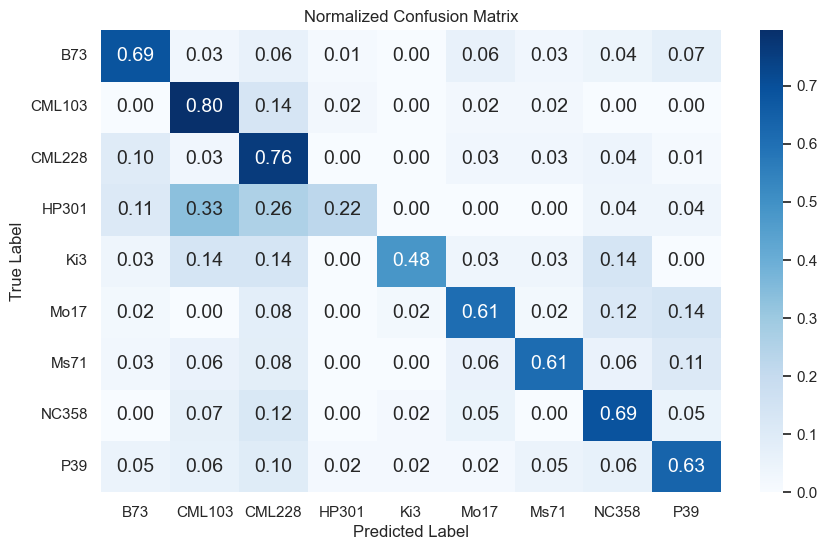

(     Metadata_genotype.x
 56                   B73
 494                  Ki3
 1676              CML228
 218                HP301
 744               CML228
 ...                  ...
 1911               NC358
 2033                 P39
 1132              CML103
 700               CML103
 1228              CML228
 
 [446 rows x 1 columns],
 array(['B73', 'CML228', 'CML228', 'CML103', 'CML228', 'Mo17', 'CML228',
        'NC358', 'CML228', 'P39', 'CML228', 'Ms71', 'CML103', 'CML103',
        'CML228', 'CML103', 'B73', 'P39', 'CML103', 'Mo17', 'B73', 'P39',
        'P39', 'Ms71', 'B73', 'Mo17', 'Mo17', 'CML228', 'NC358', 'Mo17',
        'P39', 'P39', 'B73', 'B73', 'CML103', 'CML228', 'CML228', 'NC358',
        'CML228', 'NC358', 'P39', 'P39', 'CML228', 'CML228', 'P39', 'Mo17',
        'NC358', 'CML228', 'Ms71', 'CML103', 'HP301', 'B73', 'CML228',
        'CML228', 'CML228', 'Ms71', 'CML103', 'B73', 'NC358', 'HP301',
        'Mo17', 'Ki3', 'NC358', 'B73', 'Ms71', 'CML228', 'NC358', 'CML103',


In [6]:
### GC features

genotypes = df['Metadata_genotype.x'].unique()

X = df.filter(regex='^(GCO)')
y = df.filter(['Metadata_genotype.x'])
from Random_forest_classifier import run_random_forest_classifier
feature_names, sorted_importances = run_random_forest_classifier(X, y, 1000, n = 42)

from Random_forest_classifier import visulize_feature_importance
visulize_feature_importance(20, 16, feature_names, sorted_importances)

from Random_forest_classifier import evaluation_classifier
from Random_forest_classifier import visulize_confusion_matrix

y_pred, y_test = evaluation_classifier(X, y, test_size=0.2, n_estimators=1000, random_state=42)
print(y_test)
columns = genotypes
visulize_confusion_matrix(y_ture=y_test, columns = columns,  y_pred = y_pred, a=10, b=6)


/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


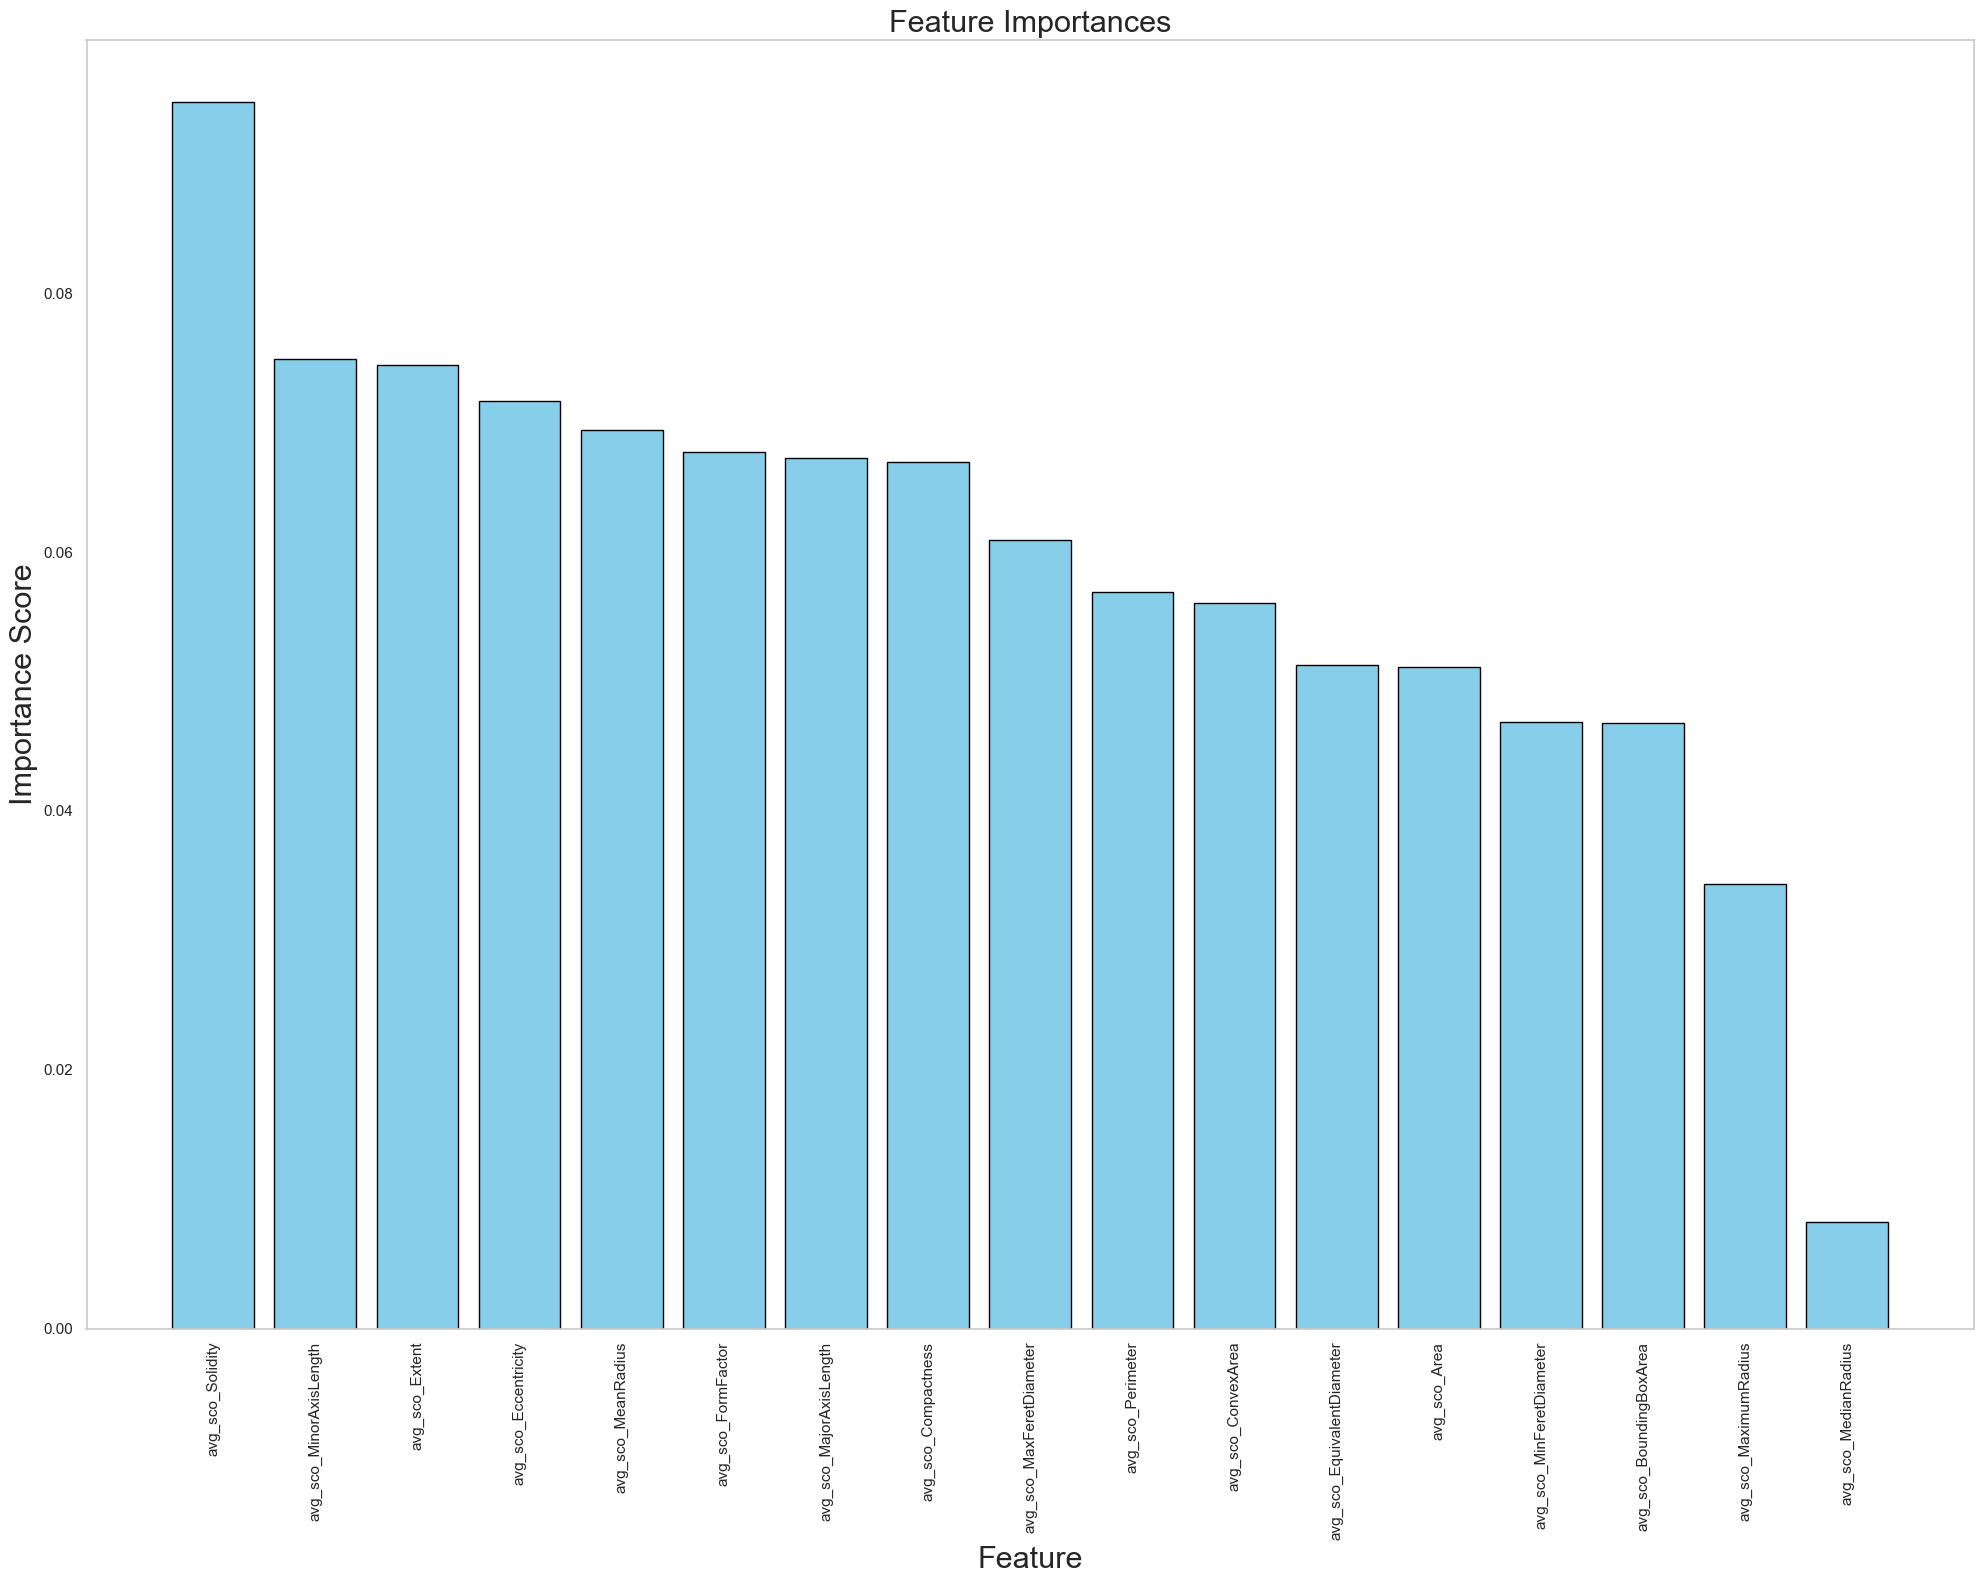

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.5756011019447886
Recall: 0.5672645739910314
F1 Score: 0.5650176432330308
Accuracy: 0.5672645739910314
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]
     Metadata_genotype.x
56                   B73
494                  Ki3
1676              CML228
218                HP301
744               CML228
...                  ...
1911               NC358
2033                 P39
1132              CML103
700               CML103
1228              CML228

[446 rows x 1 columns]


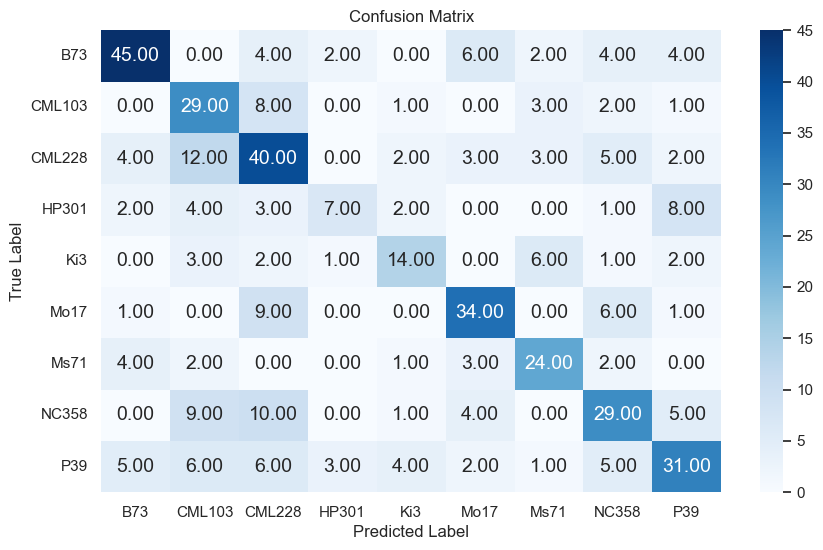

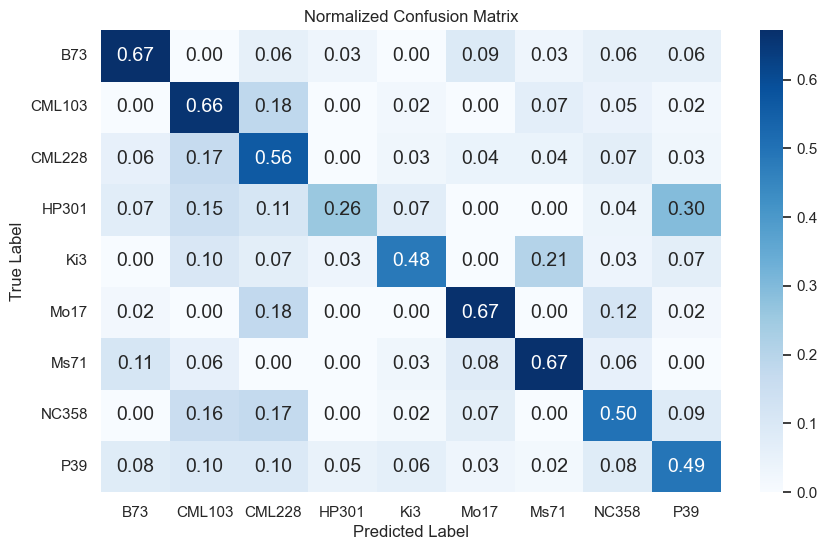

(     Metadata_genotype.x
 56                   B73
 494                  Ki3
 1676              CML228
 218                HP301
 744               CML228
 ...                  ...
 1911               NC358
 2033                 P39
 1132              CML103
 700               CML103
 1228              CML228
 
 [446 rows x 1 columns],
 array(['Mo17', 'Ki3', 'CML228', 'HP301', 'CML228', 'Mo17', 'CML228',
        'NC358', 'HP301', 'Mo17', 'Ms71', 'Ms71', 'CML103', 'CML103',
        'CML228', 'CML103', 'B73', 'HP301', 'Ki3', 'CML228', 'B73',
        'CML228', 'P39', 'CML228', 'B73', 'NC358', 'Mo17', 'Ms71', 'B73',
        'Mo17', 'P39', 'P39', 'CML103', 'B73', 'CML103', 'Ki3', 'Mo17',
        'NC358', 'B73', 'NC358', 'P39', 'Mo17', 'Ms71', 'CML228', 'CML103',
        'CML103', 'Mo17', 'P39', 'NC358', 'CML103', 'P39', 'B73', 'P39',
        'NC358', 'CML228', 'Mo17', 'CML103', 'B73', 'Mo17', 'HP301',
        'Mo17', 'Ki3', 'CML228', 'B73', 'Ms71', 'NC358', 'NC358', 'CML103',
        'Ms71

In [7]:
### SC features
genotypes = df['Metadata_genotype.x'].unique()

X = df.filter(regex='^(avg_)')
y = df.filter(['Metadata_genotype.x'])
from Random_forest_classifier import run_random_forest_classifier
feature_names, sorted_importances = run_random_forest_classifier(X, y, 1000, n = 42)

from Random_forest_classifier import visulize_feature_importance
visulize_feature_importance(20, 16, feature_names, sorted_importances)

from Random_forest_classifier import evaluation_classifier
from Random_forest_classifier import visulize_confusion_matrix

y_pred, y_test = evaluation_classifier(X, y, test_size=0.2, n_estimators=1000, random_state=42)
print(y_test)
columns = genotypes
visulize_confusion_matrix(y_ture=y_test, columns = columns,  y_pred = y_pred, a=10, b=6)


      Metric  All_feature       SCO       GCO
0  Precision     0.697872  0.575083  0.663166
1     Recall     0.688341  0.567265  0.647982
2   F1 Score     0.685820  0.564795  0.641036
3   Accuracy     0.688341  0.567265  0.647982


<Figure size 1000x600 with 0 Axes>

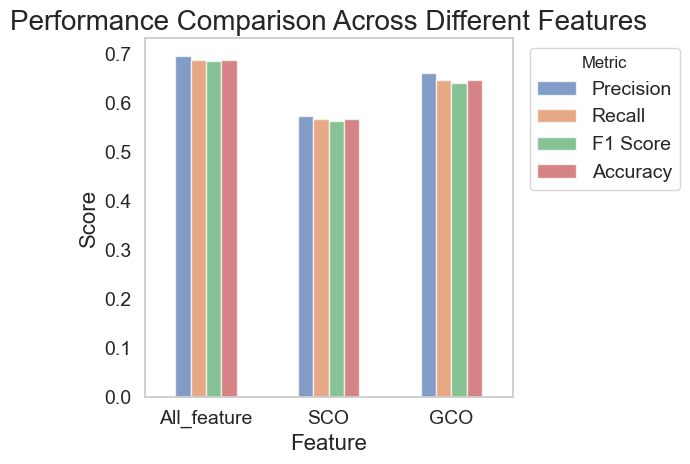

In [8]:
### Visulization of the confusion matrix of the classifiers using the GCO features, the SC features, and the combined features

data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'All_feature': [0.6978723168837083, 0.6883408071748879, 0.6858196011071382, 0.6883408071748879],
    'SCO': [0.5750834622950078, 0.5672645739910314, 0.5647948042819123, 0.5672645739910314],
    'GCO': [0.6631655033594059, 0.647982062780269, 0.6410359584266648, 0.647982062780269]
}

df = pd.DataFrame(data)
print(df)
plt.figure(figsize=(10, 6))
df_transposed = df.set_index('Metric').transpose()
df_transposed.plot(kind='bar', alpha=0.7)
plt.title('Performance Comparison Across Different Features', fontsize=20)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Metric', fontsize=14, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(False)

plt.tight_layout()
plt.show()

Classifier analysis based on the stomatal open and close speed

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


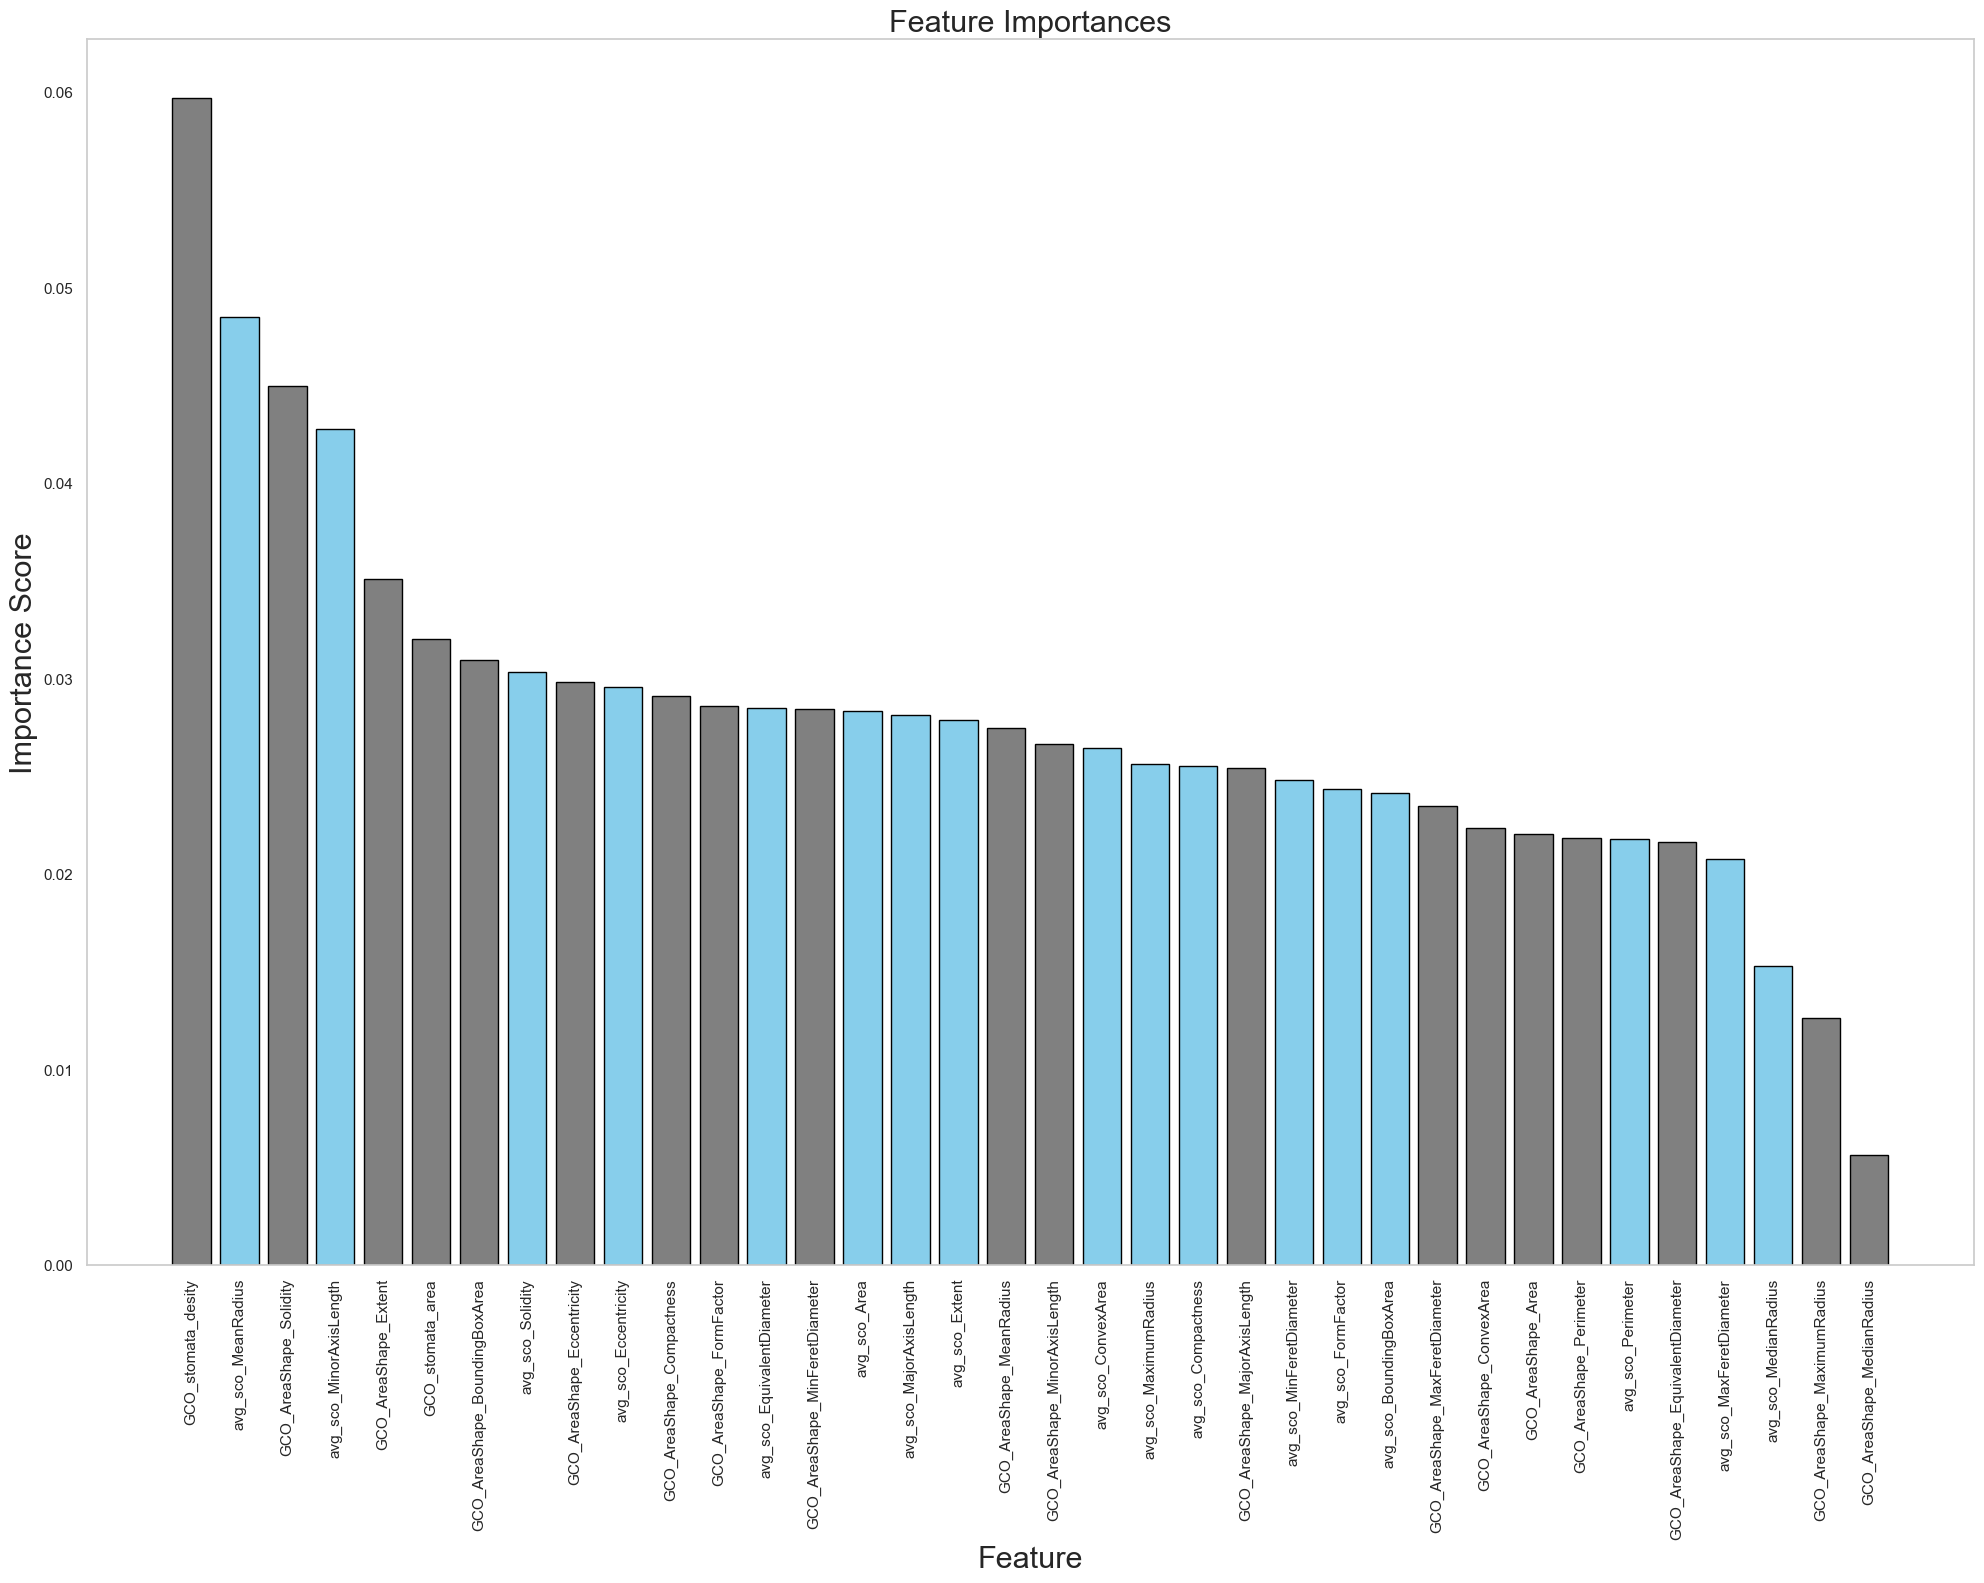

/Users/houlinyu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precision: 0.8451085454303602
Recall: 0.8430493273542601
F1 Score: 0.8432484872877252
Accuracy: 0.8430493273542601
     single_genotype
56              slow
494             fast
1676            fast
218             slow
744             fast
...              ...
1911            slow
2033            fast
1132            fast
700             fast
1228            fast

[446 rows x 1 columns]
     single_genotype
56              slow
494             fast
1676            fast
218             slow
744             fast
...              ...
1911            slow
2033            fast
1132            fast
700             fast
1228            fast

[446 rows x 1 columns]


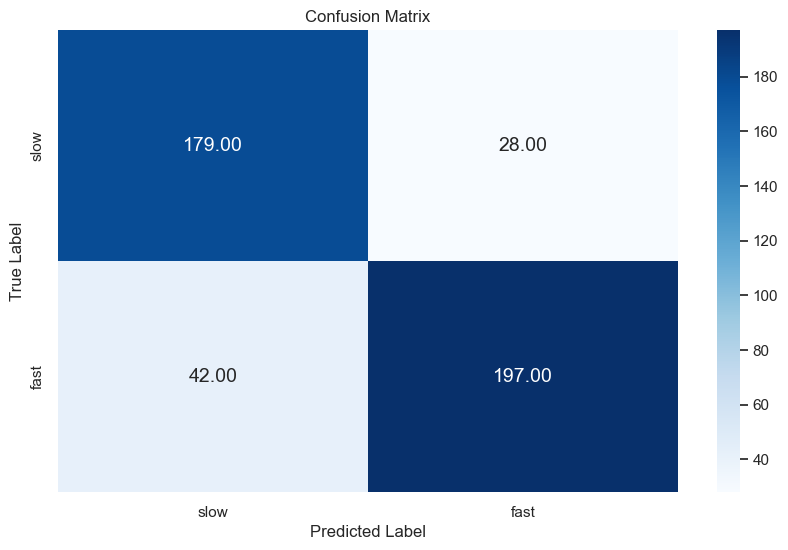

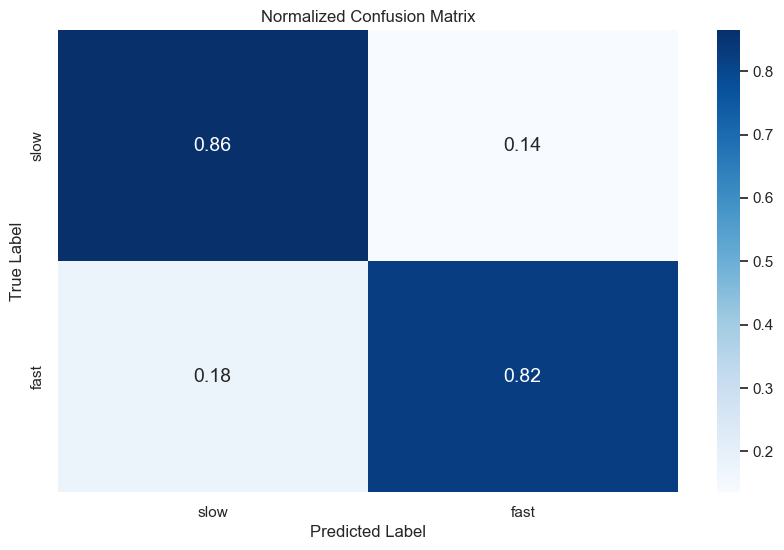

(     single_genotype
 56              slow
 494             fast
 1676            fast
 218             slow
 744             fast
 ...              ...
 1911            slow
 2033            fast
 1132            fast
 700             fast
 1228            fast
 
 [446 rows x 1 columns],
 array(['slow', 'fast', 'fast', 'slow', 'fast', 'slow', 'fast', 'slow',
        'slow', 'slow', 'fast', 'slow', 'fast', 'fast', 'fast', 'fast',
        'slow', 'slow', 'fast', 'slow', 'slow', 'fast', 'fast', 'fast',
        'slow', 'slow', 'slow', 'fast', 'slow', 'slow', 'fast', 'fast',
        'fast', 'slow', 'fast', 'fast', 'slow', 'slow', 'fast', 'slow',
        'fast', 'slow', 'fast', 'fast', 'fast', 'slow', 'slow', 'fast',
        'slow', 'fast', 'fast', 'slow', 'fast', 'slow', 'fast', 'slow',
        'fast', 'slow', 'slow', 'slow', 'slow', 'fast', 'slow', 'slow',
        'slow', 'slow', 'slow', 'fast', 'slow', 'slow', 'fast', 'slow',
        'slow', 'slow', 'slow', 'fast', 'slow', 'slow', 'fast

In [11]:
df = morph.copy()
genotypes = ['Ms71', 'Mo17', 'HP301', 'B73','NC358']

df['single_genotype'] = df['Metadata_genotype.x'].apply(lambda x: "slow" if x in genotypes else "fast")

X = df.filter(regex='^(GCO|avg_)')
y = df.filter(['single_genotype'])
from Random_forest_classifier import run_random_forest_classifier
feature_names, sorted_importances = run_random_forest_classifier(X, y, 1000, n = 42)

from Random_forest_classifier import visulize_feature_importance
visulize_feature_importance(20, 16, feature_names, sorted_importances)

from Random_forest_classifier import evaluation_classifier
from Random_forest_classifier import visulize_confusion_matrix

y_pred, y_test = evaluation_classifier(X, y, test_size=0.2, n_estimators=1000, random_state=42)
print(y_test)
columns = y["single_genotype"].unique()
visulize_confusion_matrix(y_ture=y_test, columns = columns,  y_pred = y_pred, a=10, b=6)
